In [73]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import sys
from pathlib import Path
import requests
import os

In [74]:
renewable_energy = pd.read_csv('resources/global-data-on-sustainable-energy.csv', encoding='ISO-8859-1')
renewable_energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [75]:
dr_stats = renewable_energy[renewable_energy['Entity'] == 'Dominican Republic']

dr_stats_cleaned = dr_stats.fillna(value=0)
dr_stats_cleaned


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
966,Dominican Republic,2000,88.764930,84.10,53.73,11100000.0,19.11,7.34,0.0,0.75,...,10094.0440,3.90,18670.00000,0.0,4.661762,2869.178139,225,48670.0,18.735693,-70.162651
967,Dominican Republic,2001,89.791360,84.70,54.11,4170000.0,18.89,9.07,0.0,0.70,...,9667.4000,3.70,18980.00000,0.0,2.459516,2977.434510,225,48670.0,18.735693,-70.162651
968,Dominican Republic,2002,89.749820,85.50,53.33,670000.0,17.94,10.98,0.0,0.87,...,10064.7890,3.87,20879.99916,0.0,4.495103,3110.325447,225,48670.0,18.735693,-70.162651
969,Dominican Republic,2003,89.173805,86.05,52.62,0.0,18.94,11.38,0.0,1.19,...,9104.6420,3.53,18729.99954,0.0,-1.345706,2418.350422,225,48670.0,18.735693,-70.162651
970,Dominican Republic,2004,90.316570,86.40,51.89,460000.0,20.67,9.58,0.0,1.60,...,8357.8955,3.34,17280.00069,0.0,2.570134,2487.329061,225,48670.0,18.735693,-70.162651
971,Dominican Republic,2005,90.141230,86.70,51.21,6260000.0,19.44,10.14,0.0,1.91,...,9065.0880,3.19,18690.00053,0.0,9.428237,3932.784407,225,48670.0,18.735693,-70.162651
972,Dominican Republic,2006,90.118150,87.00,50.64,530000.0,17.98,11.36,0.0,1.75,...,8931.6010,3.03,20370.00084,0.0,9.174355,4109.033591,225,48670.0,18.735693,-70.162651
973,Dominican Republic,2007,96.876340,87.10,50.00,370000.0,17.89,11.98,0.0,1.70,...,9066.1980,2.93,20629.99916,0.0,7.415952,4707.795052,225,48670.0,18.735693,-70.162651
974,Dominican Republic,2008,97.576195,87.30,49.72,150000.0,17.68,10.34,0.0,1.38,...,8900.0790,2.73,20579.99992,0.0,3.209504,5087.983213,225,48670.0,18.735693,-70.162651
975,Dominican Republic,2009,97.857760,87.40,54.86,310000.0,17.34,10.13,0.0,1.46,...,8679.0130,2.64,19659.99985,0.0,0.946155,5039.403122,225,48670.0,18.735693,-70.162651


In [76]:
#Read in consumer price inflation for the Dominican Repoublic specifically
inflation_df = pd.read_csv('Resources/GlobalDatasetofInflation.csv', encoding='ISO-8859-1')
inflation_df.head()

dr_inflation = inflation_df[inflation_df['Country'] == 'Dominican Republic']
dr_energy_inflation = dr_inflation[dr_inflation['Series Name'] == 'Energy Consumer Price Inflation']
dr_energy_inflation

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
249,DOM,243.0,Dominican Republic,Inflation,Energy Consumer Price Inflation,-1.0,3.7,7.0,3.5,34.8,...,-2.25,2.2,6.47,11.07,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN


In [77]:
# Select only year columns (e.g., columns representing 1990 to 2023)
year_columns = [col for col in dr_energy_inflation.columns if col.isdigit()]

# Melt the DataFrame to convert year columns into rows
melted_df = dr_energy_inflation.melt(id_vars=['Country'], value_vars=year_columns, 
                           var_name='Year', value_name='Inflation')

# Drop NaN values (optional, if some years don't have inflation data)
melted_df = melted_df.dropna(subset=['Inflation'])
melted_df;


In [78]:
# Select relevant columns
comparison_df = dr_stats_cleaned[['Year', 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']]

# Sort by year (optional, if not already sorted)
comparison_df = comparison_df.sort_values(by='Year').reset_index(drop=True)

# Calculate year-over-year differences for fossil fuels and renewables
comparison_df['Fossil Fuels YoY Change (TWh)'] = comparison_df['Electricity from fossil fuels (TWh)'].diff()
comparison_df['Renewables YoY Change (TWh)'] = comparison_df['Electricity from renewables (TWh)'].diff()

# Display the resulting DataFrame
comparison_df;

In [79]:
# Convert 'Year' column in both DataFrames to string type
melted_df['Year'] = melted_df['Year'].astype(str)
comparison_df['Year'] = comparison_df['Year'].astype(str)

# Now merge the DataFrames
merged_df = pd.merge(melted_df, comparison_df, on='Year')
merged_df

,Country,Year,Inflation,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Fossil Fuels YoY Change (TWh),Renewables YoY Change (TWh)
0,Dominican Republic,2000,8.53,7.34,0.75,NaN,NaN
1,Dominican Republic,2001,6.74,9.07,0.70,1.73,-0.05
2,Dominican Republic,2002,12.96,10.98,0.87,1.91,0.17
3,Dominican Republic,2003,36.82,11.38,1.19,0.40,0.32
4,Dominican Republic,2004,25.26,9.58,1.60,-1.80,0.41
5,Dominican Republic,2005,9.79,10.14,1.91,0.56,0.31
6,Dominican Republic,2006,11.82,11.36,1.75,1.22,-0.16
7,Dominican Republic,2007,3.60,11.98,1.70,0.62,-0.05
8,Dominican Republic,2008,5.44,10.34,1.38,-1.64,-0.32
9,Dominican Republic,2009,8.03,10.13,1.46,-0.21,0.08


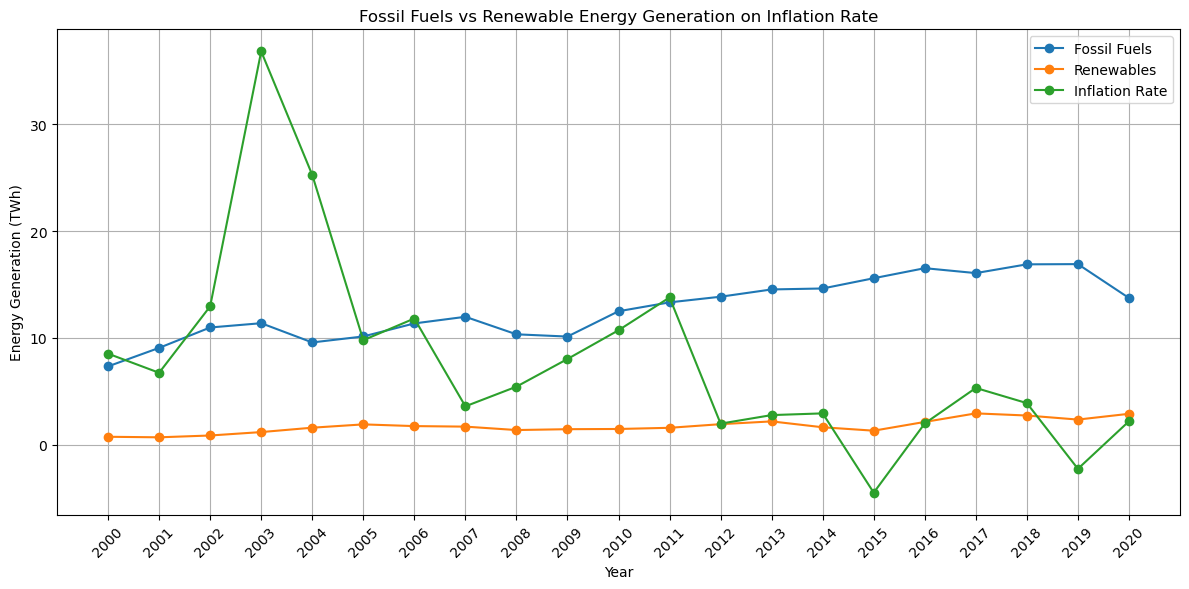

In [80]:
# Assuming the DataFrame is named `df` and the years are stored in a column named 'Year'
years = comparison_df['Year'].astype(int)  # Extract the years column and ensure they are integers

# Assuming the data for fossil fuels and renewables are stored in corresponding columns
fossil_fuels = merged_df['Electricity from fossil fuels (TWh)']
renewables = merged_df['Electricity from renewables (TWh)']
energy_inflation_rate = merged_df['Inflation']

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(years, fossil_fuels, label='Fossil Fuels', marker='o')
plt.plot(years, renewables, label='Renewables', marker='o')
plt.plot(years, energy_inflation_rate, label='Inflation Rate', marker='o')

# Set x-ticks as whole numbers
plt.xticks(ticks=years, labels=years, rotation=45)  # Rotate for better readability if needed

# Customize the plot
plt.title('Fossil Fuels vs Renewable Energy Generation on Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Energy Generation (TWh)')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()